##Imports

In [66]:
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
import numpy as np
from sklearn.neural_network import MLPClassifier

##Part1 - Hearth Disease Dataset

In [67]:
#Load the dataset from a CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names)

In [68]:
# Preprocess the data
heart_data = heart_data.replace('?', pd.NA).dropna()  # Handling missing values
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [69]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(237, 13)
(237,)
(60, 13)
(60,)


##EDA

In [72]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0
262,60.0,0.0,1.0,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0


In [73]:
y_train.head()

277    0
262    0
30     0
22     1
281    0
Name: target, dtype: int64

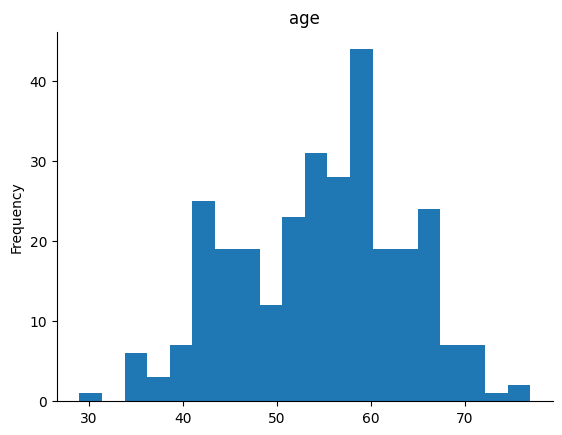

In [74]:
# @title age

from matplotlib import pyplot as plt
X['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

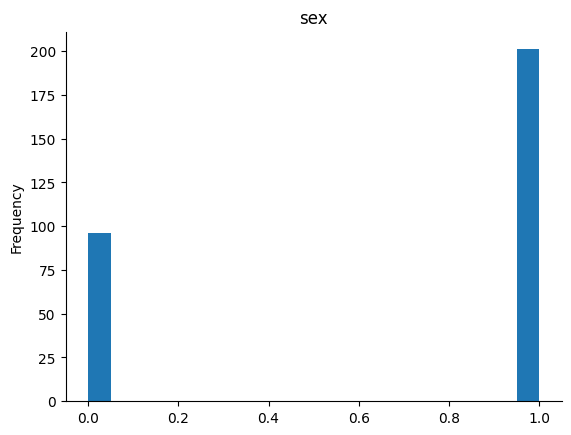

In [75]:
# @title sex

from matplotlib import pyplot as plt
X['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

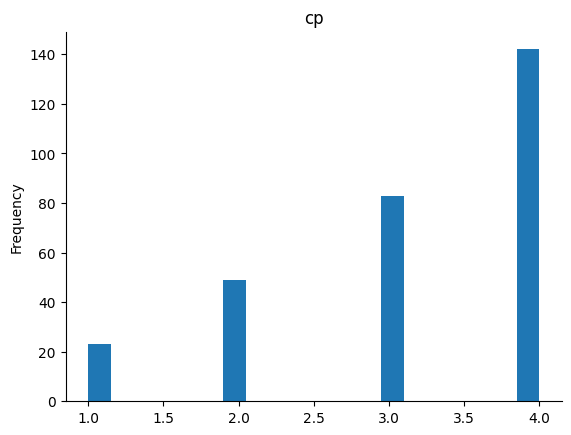

In [76]:
# @title cp

from matplotlib import pyplot as plt
X['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

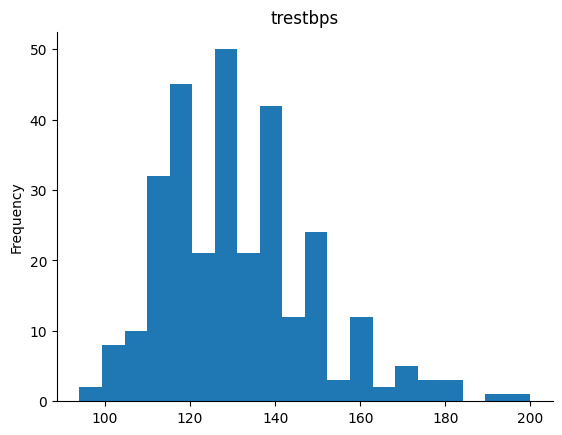

In [77]:
# @title trestbps

from matplotlib import pyplot as plt
X['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

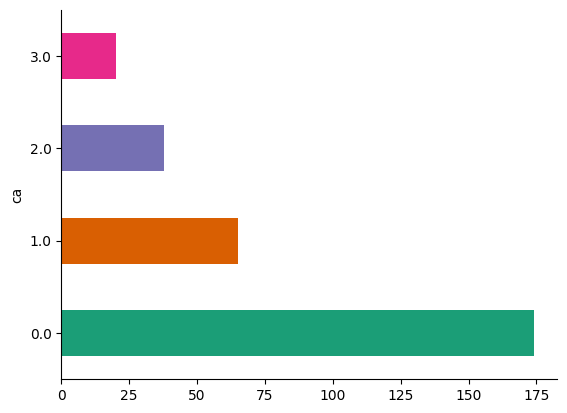

In [78]:
# @title ca

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('ca').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

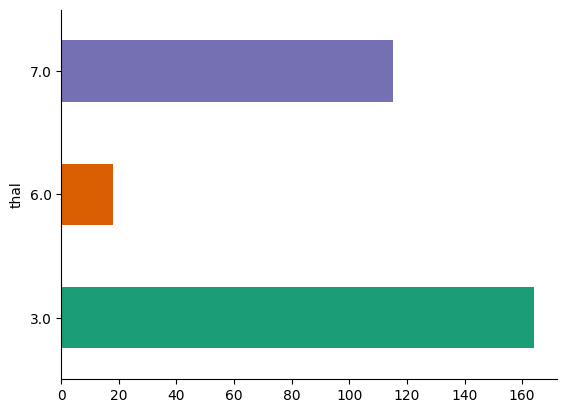

In [79]:
# @title thal

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('thal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Part2 - Multi Layer Perceptron

In [80]:
#Perceptron definiton to base_clf and fitting
base_clf = Perceptron(random_state=42, max_iter=2500)
base_clf.fit(X_train, y_train)


Perceptron(max_iter=2500, random_state=42)

In [81]:
#Prediction to preceptron fitting element
y_pred = base_clf.predict(X_test)

In [82]:
#Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron: Accuracy = {accuracy}")

Perceptron: Accuracy = 0.3333333333333333


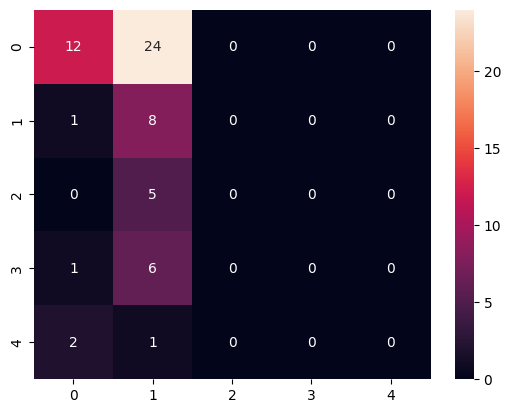

In [83]:
#Plot confusion matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [84]:
#Adaboost classifier, that use Perseptron that we fitted and Samme algorithm. And adaboots fitting
adaBoost = AdaBoostClassifier(estimator=base_clf, random_state=42, algorithm='SAMME')
adaBoost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=Perceptron(max_iter=2500, random_state=42),
                   random_state=42)

In [85]:
#Adaboost fitting predict
y_pred = adaBoost.predict(X_test)

In [86]:
#Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost with MLP as base classifier: Accuracy = {accuracy}")

AdaBoost with MLP as base classifier: Accuracy = 0.5333333333333333


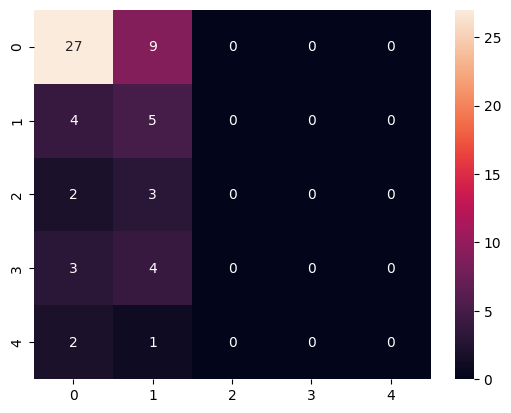

In [87]:
# draw confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


##Part3 - Random Decision Forest

In [88]:
#Implementation of perceptron
class TrainablePerceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iterations=100):
        self.max_iterations = max_iterations
        self.perceptron = MLPClassifier(hidden_layer_sizes=(10,), random_state=42,  max_iter=2500)

    def fit(self, X, y):
        self.perceptron.fit(X, y)

    def predict(self, X):
        return self.perceptron.predict(X)

In [89]:
#Implementation of random decision forest with Perceptron
class RandomDecisionForest(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, max_iterations=100, random_state=None):
        self.n_estimators = n_estimators
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            X_resampled, y_resampled = resample(X, y, random_state=self.random_state)
            perceptron = TrainablePerceptron(max_iterations=self.max_iterations)
            perceptron.fit(X_resampled, y_resampled)
            self.estimators.append(perceptron)

    def predict(self, X):
        predictions = []
        for estimator in self.estimators:
            predictions.append(estimator.predict(X))
        return np.mean(predictions, axis=0)

In [90]:
#Calling random decision forest class and fitting this
random_forest = RandomDecisionForest(n_estimators=20, max_iterations=2500, random_state=42)
random_forest.fit(X_train, y_train)

In [91]:
#Predict fitted random forest
y_pred = random_forest.predict(X_test)

In [92]:
#Print accuracy value
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Decision Forest with Trainable Perceptrons: Accuracy = {accuracy}")

Random Decision Forest with Trainable Perceptrons: Accuracy = 0.5666666666666667


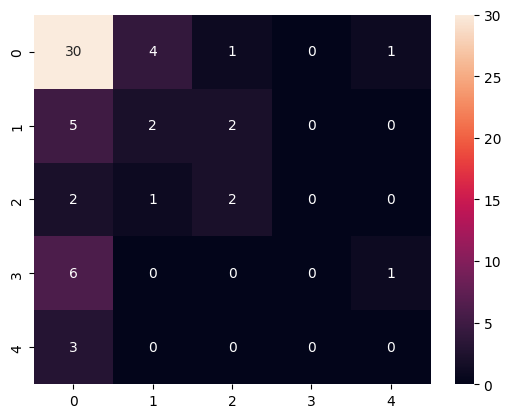

In [93]:
#Plot confusion matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()